### Overview

In this article, we will be making the angle detection application using computer vision we have often come across geometry in our high school and have struggled to draw the different angles using protractor, though here also we will be doing the same thing but this time with the help of computer vision we will draw three dots and after connecting them we will detect what degrees of angle it will form. 

### Real-world application

1. Mathematical operation: Angle detection is one of the problem statement to be solved.
2. Digital classes: Modern classes can widely use this concept for better visual experience.
3. AI game development: When we want AI to automate the game.

### We will start by loading all the necessary libraries

In [1]:
import cv2
import math
import matplotlib.pyplot as plt

### Providing path to the file we want to evaluate and the reading it

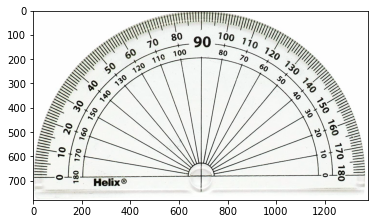

In [2]:
path_of_image = 'protractor.jpg'
image_angle = cv2.imread(path_of_image)
plt.imshow(image_angle)
dots_list = []

Code-breakdown

1. First of all we are creating a variable to store the path of the image on which we will be drawing and detecting the angles.


2. Then we are reading the image whose path we have just stored and with the help of cv2's `imread function` and store it in the varible to use it for further preprocessing.


3. Here we will have one more variable which will hold the coordinates of dot that we will be creating to join Those 2 dot ( we will discuss more about it just in our next segment).

### Function to draw the dot and join them to form a line

So, first let's discuss what would be the functionality of it:

1. First of all this function will be responsible for creating a dot on the image whenever we used to click the `left button`or `double click` and then by using `dot function` we will draw the dot on the cv2 image.


2. Along with creating a dot on the image this function will be also joining the lines which will join the three dots i.e. it will be joining the dot with the help of `line function`.

In [3]:
def dots_of_mouse(mouse_click,x_cor,y_cor,flag_var,parameters):
    if mouse_click == cv2.EVENT_LBUTTONDOWN:
        size_of_dot = len(dots_list)
        if size_of_dot != 0 and size_of_dot % 3 != 0:
            cv2.arrowedLine(image_angle,tuple(dots_list[round((size_of_dot-1)/3)*3]),(x_cor,y_cor),(0,0,255),2)
        cv2.circle(image_angle,(x_cor,y_cor),5,(0,0,255),cv2.FILLED)
        dots_list.append([x_cor,y_cor])

Code-breakdown:

1. First let's discuss the parameters that this function will mainly use:
    * mouse_click: This parameter holds what kind of mouse click is occurred whether it is the right button clicked or left button or any other that the mouse can produce.
    * x_cor: This is the X value of the dot.
    * y_cor: This is the Y value of the dot. Both x and y value is responsible to draw a single dot on the image.


2. Our very first step will be to validate that the mouse click that has occurred and it should be left button click then only further preprocessing work will be done.


3. After the validation we will see the size or the length of `dots_list` and then with the help of the if condition we will see that the length/size of the dot should neither be **0** nor be **divisible by 3**.


4. Just after the above condition will be True then only we will draw the `arrowed line` on the image following the x value and the Y value.


5. We can again draw the dot so that after one detection of angle from the previous dots we can do that again in the same instance also we will append the dots in our list of dots when you will print this variable you will see the exact value where the dot is drawn.

### Defining gradient 

In [4]:
def finding_gradient(dot1,dot2):
    return (dot2[1]-dot1[1])/(dot2[0]-dot1[0])

Code-breakdown

So here we will be finding the gradient of the dots or in simple terms we will find the `slope` of 2 dots.

1. In this function we will take dot 1 and dot 2 as the parameters to find the slope of those two dots.
2. Then we will find the slope using the mathematical formula i.e. **y2-y1/x2-x1** and then we will simply return the slope of the given dots.

### Funtion That Evaluates angle

Now, here comes the function which will do the main task for us i.e to evaluate the angle based on the 3 dots we will draw on the image.
When we will see the parameters of the image it only have one parameter i.e. **dots_list** i.e this function will require only the coordinates of X and Y of those dots to get the angle as the result.

In [5]:
def evaluate_angle(dots_list):
    dot1, dot2, dot3 = dots_list[-3:]
    m1 = finding_gradient(dot1,dot2)
    m2 = finding_gradient(dot1,dot3)
    angleR = math.atan((m2-m1)/(1+(m2*m1)))
    angleD = round(math.degrees(angleR))
 
    cv2.putText(image_angle,str(angleD),(dot1[0]-40,dot1[1]-20),cv2.FONT_HERSHEY_COMPLEX,
                1.5,(0,0,255),2)

Code-breakdown

1. Firstly we can see that we are initialising the position of dots seperately i.e. assigining the values of `dots_list` to dot1, 2 and 3.


2. Now we will store the slope of 2 dots in m1 and m2 respectively which `finding_gradient` function will return.


3. Here, we will use the `math.atan` function because we have to find the arc i.e. angle. Then we will use the formulae to find the angle when the slopes are already given and the formula is as follows:
    * tan inverse = m2-m1/(1+(m2xm1) where m1 and m2 are slopes of 2 dots.
    

4. Then we will use the `degree` function from the **math module** to get the result in the form of degrees.


5. At the last we will simply use `putText` method to show the value of angle.

### A function that will show the angle on the screen

In [ ]:
while True:

    if len(dots_list) % 3 == 0 and len(dots_list) !=0:
        evaluate_angle(dots_list)
 
    cv2.imshow('Image',image_angle)
    cv2.setMouseCallback('Image',dots_of_mouse)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        dots_list = []
        image_angle = cv2.imread(path_of_image)

k = cv2.waitKey(0) & 0xFF
if k==27:
        cv2.destroyAllWindows()

Code-breakdown:

1. Everything in this function will be under the infinite while loop 
2. Then we will check that length of dots should be divisble by 3 and it should not be equal to 0.
3. Then only we will call the evaluate angle function which will return the **angle**.
4. We have used setMouseCallback function to detect if the left button is clicked then we will call the function which will get the dots.
5. At the last we will destroy the windows when the 'q' key is pressed.

### Conclusion

We saw in the output how we can draw 3 points and then we can get the angle that is formed. We can try with different images to test our function we just have to change the path of the image to check if other images are giving good results or not.